In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import warnings
import scipy
import scipy.stats as scs
import sys
import os


ModuleNotFoundError: No module named 'matplotlib'

In [2]:
pip install matplotlib

^C
Note: you may need to restart the kernel to use updated packages.


ERROR: Exception:
Traceback (most recent call last):
  File "c:\Users\samrit\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_vendor\urllib3\response.py", line 435, in _error_catcher
    yield
  File "c:\Users\samrit\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_vendor\urllib3\response.py", line 516, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "c:\Users\samrit\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
  File "c:\Users\samrit\AppData\Local\Programs\Python\Python310\lib\http\client.py", line 465, in read
    s = self.fp.read(amt)
  File "c:\Users\samrit\AppData\Local\Programs\Python\Python310\lib\socket.py", line 705, in readinto
    return self._sock.recv_into(b)
  File "c:\Users\samrit\AppData\Local\Programs\Python\Python310\lib\ssl.py", line 1273, in recv_into
    return self.read(nbytes, buffer)
  File "c:\Users\samrit\App

     ----------------------------------       6.1/7.2 MB 12.4 kB/s eta 0:01:26


In [11]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))

## Data Reading 

In [12]:
df = pd.read_csv('../data/AdSmartABdata.csv')
df.head()

auction_id experiment        date  hour  \
0  0008ef63-77a7-448b-bd1e-075f42c55e39    exposed  2020-07-10     8   
1  000eabc5-17ce-4137-8efe-44734d914446    exposed  2020-07-07    10   
2  0016d14a-ae18-4a02-a204-6ba53b52f2ed    exposed  2020-07-05     2   
3  00187412-2932-4542-a8ef-3633901c98d9    control  2020-07-03    15   
4  001a7785-d3fe-4e11-a344-c8735acacc2c    control  2020-07-03    15   

          device_make  platform_os                browser  yes  no  
0  Generic Smartphone            6          Chrome Mobile    0   0  
1  Generic Smartphone            6          Chrome Mobile    0   0  
2               E5823            6  Chrome Mobile WebView    0   1  
3   Samsung SM-A705FN            6               Facebook    0   0  
4  Generic Smartphone            6          Chrome Mobile    0   0

In [13]:
#Determining the users who responded to the ads

response_df = df.query("(yes == 1 or no == 1)")
response_df.shape[0]

1243

In [14]:
#Total number of users
df.shape[0]

8077

Out of the 8077 users, only 1243 responded to the questionnaire

In [22]:
#Getting clean data containing only users who responded alongside relevant columns for testing

clean_df = response_df[['auction_id', 'experiment', 'yes', 'no']]
clean_df

auction_id experiment  yes  no
2     0016d14a-ae18-4a02-a204-6ba53b52f2ed    exposed    0   1
16    008aafdf-deef-4482-8fec-d98e3da054da    exposed    1   0
20    00a1384a-5118-4d1b-925b-6cdada50318d    exposed    0   1
23    00b6fadb-10bd-49e3-a778-290da82f7a8d    control    1   0
27    00ebf4a8-060f-4b99-93ac-c62724399483    control    0   1
...                                    ...        ...  ...  ..
8059  ffa08ff9-a132-4051-aef5-01a9c79367bc    exposed    1   0
8063  ffb176df-ecd2-45d3-b05f-05b173a093a7    exposed    1   0
8064  ffb79718-6f25-4896-b6b3-e58b80a6e147    control    0   1
8069  ffca1153-c182-4f32-9e90-2a6008417497    control    0   1
8071  ffdfdc09-48c7-4bfb-80f8-ec1eb633602b    exposed    0   1

[1243 rows x 4 columns]

The rates of aware users in both the control and exposed groups are as shown in the yes column above

In [24]:
actual_counts = clean_df.pivot_table(index='experiment', aggfunc='sum')
actual_counts['total'] = clean_df.pivot_table(values='yes', index='experiment', aggfunc='count')
actual_counts


no  yes  total
experiment                 
control     322  264    586
exposed     349  308    657

The actual number of users aware and those not aware of the ad and the totals for each group

In [25]:
#Determining the number of users aware or not between the two groups to determine their conversion rates

conversion_rates = clean_df.pivot_table(index='experiment')
conversion_rates

no       yes
experiment                    
control     0.549488  0.450512
exposed     0.531202  0.468798

## Binomial Distribution

In [27]:
# fig, ax = plt.subplots(figsize=(12,6))
# xA = np.linspace(A_converted-49, A_converted+50, 100)
# yA = scs.binom(A_total, p_A).pmf(xA)
# ax.bar(xA, yA, alpha=0.5)
# xB = np.linspace(B_converted-49, B_converted+50, 100)
# yB = scs.binom(B_total, p_B).pmf(xB)
# ax.bar(xB, yB, alpha=0.5)
# plt.xlabel('converted')
# plt.ylabel('probability')

The above is a template for drawing the binomial distribution for the null and alternative hypothesis

In [47]:
exposed_conversion_rate = conversion_rates['yes']['exposed']
control_conversion_rate = conversion_rates['yes']['control']
expose_aware = actual_counts['yes']['exposed']
control_aware = actual_counts['yes']['control']
exposed_total = actual_counts['total']['exposed']
control_total = actual_counts['total']['control']
difference = exposed_conversion_rate - control_conversion_rate

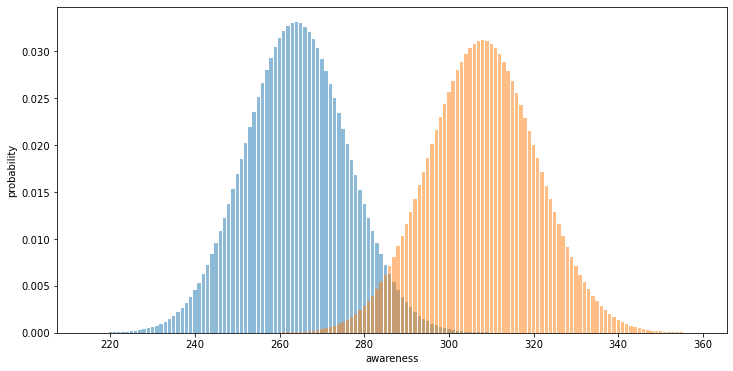

In [50]:
fig, ax = plt.subplots(figsize=(12, 6))

xC = np.linspace(control_aware - 49, control_aware + 50, 100)
yC = scs.binom(control_total, control_conversion_rate).pmf(xC)
ax.bar(xC, yC, alpha=0.5, linestyle='--')
xE = np.linspace(expose_aware - 49, expose_aware + 50, 100)
yE = scs.binom(exposed_total , exposed_conversion_rate).pmf(xE)
ax.bar(xE, yE, alpha=0.5, linestyle='--')
plt.xlabel('awareness')
plt.ylabel('probability')
plt.show()